#### DSS General Membership Meeting #7

---

## Advanced Analysis & Drawing Conclusions
#### Monday, April 8, 2019

acknowledgement: Data100 course material

---

Today we will be looking in to ways to build models for predicting outcomes, and ways to understand how good your model is.  

Run the following line to update the modules we will be using today. Once the packages are done installing, restart your kernel and comment out this update cell.

In [ ]:
# !pip install --upgrade seaborn

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
sns.set_context("talk")

---

## 1 | Linear Regression

Loading our data. 

Run the following cell to load the data. We will use 2 separate dataframes in `boston_data`:
    - `data` : the variables in matrix form (X)
    - `target` : the known outcomes, in vector form (Y)

Here are the features/variables we will be working with in this dataset in `data`:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 USD
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of black 
                 residents by town
    13. LSTAT    % lower status of the population


In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
boston = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We will use se the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split out 10% of the data for test. Call the resulting splits `X_train`, `X_test`, `Y_train`, `Y_test`.

In [3]:
from sklearn.model_selection import train_test_split
np.random.seed(47)

X = boston
Y = pd.Series(boston_data['target'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

We will now fit a linear model to describe the relationship between the housing price and all available variables. We've imported `sklearn.linear_model` as `lm`. Fill in the cells below to fit a linear regression model and create a scatter plot for our predictions vs. the true prices.

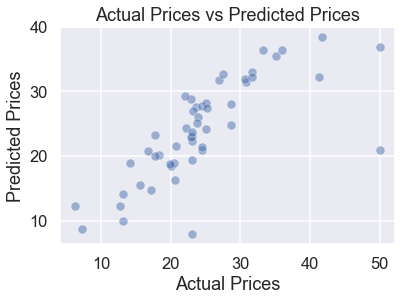

In [4]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
linear_model.fit(X_train, Y_train)

# Fit your model on the training set
Y_fitted = linear_model.predict(X_train)

# Predict housing prices on the test set
Y_pred = linear_model.predict(X_test)

# Plot predicted vs true prices
sns.scatterplot(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices");

#### Analyzing Root Mean Squared Error

As you can see, our model is not perfect. If it were perfect, we would see the identity line (i.e. a line of slope 1). 

To see how we are doing, compute the root mean squared error (RMSE) of the predicted responses: 

$$
\textbf{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 }
$$

Fill out the function below and compute the RMSE for our predictions on both the training data `X_train` and the test set `X_test`.

In [5]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    return np.sqrt(np.mean((actual_y - predicted_y) ** 2))

train_error = rmse(Y_train, Y_fitted)
test_error = rmse(Y_test, Y_pred)

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)

Training RMSE: 4.56230596093393
Test RMSE: 5.887073477757788


---

## 2 | Logistic Regression

In this section, we will be working on the breast cancer dataset. This dataset can be easily loaded using the `sklearn.datasets.load_breast_cancer()` method.  

In [6]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let us try to fit a simple model with only one feature.

In [7]:
from sklearn.model_selection import train_test_split

x = cancer[["mean radius"]]
y = (cancer_data.target == 0)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

We can now fit our model using `sklearn.linear_model`.

In [8]:
lr = lm.LogisticRegression(fit_intercept=True, solver='lbfgs')

lr.fit(x_train, y_train)

# Fit your model on the training set
y_fitted = lr.predict(x_train)

# Predict on the test set
y_pred = lr.predict(x_test)

#### Evaluating Model Performance

We will compute the training and testing accuracy for both of our training and test sets. Remember that accuracy is defined as the accurate labels (TP, TN) over the total amount of of items labeled.

In [9]:
train_accuracy = np.mean(y_fitted == y_train)
test_accuracy = np.mean(y_pred == y_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.8709
Test accuracy: 0.9091


It seems we can a get very high test accuracy. Then how about precision and recall?  
- Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances.  
- Recall (also known as sensitivity) is the fraction of relevant instances that have been retrieved over the total amount of relevant instances.

Precision is the ability of the classifier not to label as positive a sample that is negative while recall is the ability of the classifier to find all the positive samples.

$$
\text{Precision} = \frac{n_{true\_positives}}{n_{true\_positives} + n_{false\_positives}}
$$

$$
\text{Recall} = \frac{n_{true\_positives}}{n_{true\_positives} + n_{false\_negatives}}
$$

We can use a confusion matrix to help us calcuate these rates:

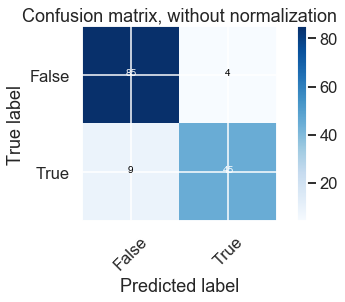

In [10]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, lr.predict(x_test))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['False', 'True']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

In [11]:
precision = 45 / (45 + 5)
recall = 45 / (45 + 9)

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

precision = 0.9000
recall = 0.8333


## 3 | Cross Validation

We are returning to our Boston dataset, and try building a simpler linear model with fewer features. While this may increase our training error, it may also decrease our test error and help prevent overfitting to the training set.

We'll use $k$-fold cross-validation to select the best subset of features for our model.

`Scikit-learn` has built-in support for cross validation.  However, to better understand how cross validation works complete the following function which cross validates a given model.

1. Use the [`KFold.split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function to get 4 splits on the training data. Note that `split` returns the indices of the data for that split.
2. For each split, select out the rows and columns based on the split indices and features.
3. Compute the RMSE on the validation split.
4. Return the average error across all cross validation splits.


In [12]:
from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)
    You should be fitting 4 models total.
    Return the average MSE of these 4 folds.

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=4)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)

        # Compute the RMSE on the validation split
        error = rmse(split_Y_valid, model.predict(split_X_valid))
        
        validation_errors.append(error)
        
    return np.mean(validation_errors)

We have defined four different feature sets, each containing three features (stored in `feature_sets` below). Use `compute_CV_error` to determine which feature set gets us the lowest average validation error. Then, fill in the variables `best_err_idx`, `best_err`, and `best_feature_set` below.

In [15]:
feature_sets = [
    ['TAX', 'INDUS', 'CRIM'], 
    ['RM', 'LSTAT', 'PTRATIO'], 
    ['RM', 'B', 'NOX'], 
    ['TAX', 'LSTAT', 'DIS']
]

errors = []
for feat in feature_sets:
    print("Trying features:", feat)
    model = lm.LinearRegression()
    # compute the cross validation error
    error = compute_CV_error(model, X_train[feat], Y_train)
    
    print("\tRMSE:", error)
    errors.append(error)

best_err_idx = np.argmin(errors)
best_err = np.min(errors)
best_feature_set = feature_sets[best_err_idx]

for i in range(4):
    print('{}, error: {}'.format(feature_sets[i], errors[i]))

best_feature_set, best_err

Trying features: ['TAX', 'INDUS', 'CRIM']
	RMSE: 7.593764533936076
Trying features: ['RM', 'LSTAT', 'PTRATIO']
	RMSE: 5.221575997721903
Trying features: ['RM', 'B', 'NOX']
	RMSE: 5.803276796238313
Trying features: ['TAX', 'LSTAT', 'DIS']
	RMSE: 6.150288547992476
['TAX', 'INDUS', 'CRIM'], error: 7.593764533936076
['RM', 'LSTAT', 'PTRATIO'], error: 5.221575997721903
['RM', 'B', 'NOX'], error: 5.803276796238313
['TAX', 'LSTAT', 'DIS'], error: 6.150288547992476


(['RM', 'LSTAT', 'PTRATIO'], 5.221575997721903)

In [ ]:
...